In [1]:
import xarray

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import glob

In [12]:
import os
os.environ['PROJ_LIB'] = r'/Users/bpo/anaconda/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj'

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [14]:
import matplotlib.cm as cm
import matplotlib as mpl

In [6]:
n0ab = xarray.open_dataset('NitrateAboveMLD_WOA_tmld_test01.nc')
n0ab.to_netcdf('NitrateAboveMLD_WOA_tmld_test01_nc3.nc', format='NETCDF3_CLASSIC')

In [7]:
p0ab = xarray.open_dataset('PhosphateAboveMLD_WOA_tmld_test01.nc')
p0ab.to_netcdf('PhosphateAboveMLD_WOA_tmld_test01_nc3.nc', format='NETCDF3_CLASSIC')

In [8]:
si0ab = xarray.open_dataset('SilicateAboveMLD_WOA_tmld_test02.nc')
si0ab.to_netcdf('SilicateAboveMLD_WOA_tmld_test02_nc3.nc', format='NETCDF3_CLASSIC')

In [5]:
n0 = xarray.open_dataset('Nitrate_WOA_tmld_test03.nc')
n0.to_netcdf('Nitrate_WOA_tmld_test03_nc3.nc', format='NETCDF3_CLASSIC')

In [9]:
tmld0 = xarray.open_dataset('Temp_WOA_tmld_test02.nc')
tmld0.to_netcdf('Temp_WOA_tmld_test02_nc3.nc', format='NETCDF3_CLASSIC')

In [6]:
# nitrate

In [9]:
n0.sel(lat=50.1,lon=-144.9,method='nearest')['n0']

<xarray.DataArray 'n0' (time: 12)>
array([14.495776, 15.536525, 13.05205 , 14.304382, 11.599093, 10.905523,
       11.157666,  7.312982,  8.980787,  9.403342, 12.443796, 14.505812])
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
    lat      float32 50.5
    lon      float32 -144.5
Attributes:
    units:    degrees centigrade

In [ ]:
#lat = 50
#lon = -70
#x,y = m(lon, lat)
#m.plot(x, y, 'bo', markersize=24)

In [10]:
Lat = np.array(n0['lat'])
Lon = np.array(n0['lon'])
n = np.array(n0['n0'])
nab = np.array(n0ab['n0'])

Lats,Lons = np.meshgrid(Lat,Lon,indexing='ij')

# NITRATE PLOT

In [25]:
plt.rcParams.update({'font.size': 22})

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Difference in Nitrate: Avg Below MLD - Avg Above MLD : December\n $_{calc.}$ $_{from}$ $_{MLD}$ $_{climatology}$ $_{and}$ $_{WOA2018}$')

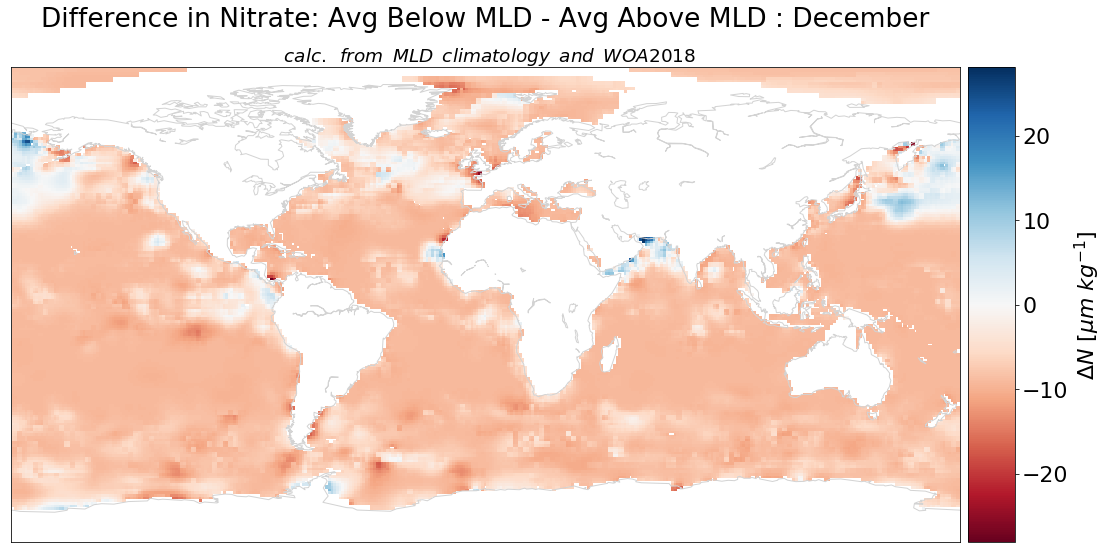

In [43]:
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
#m.shadedrelief(scale=0.5)

cmap='RdBu'

m.pcolormesh(Lons, Lats, n[:,:,11]-nab[:,:,11], latlon=True, cmap=cmap)

#lat = -10
#lon = -110
#x,y = m(lon, lat)
#m.plot(x, y, 'bo')#, markersize=24)

m.drawcoastlines(color='lightgray')

norm = mpl.colors.Normalize(vmin=-np.nanmax(n-nab), vmax=np.nanmax(n-nab))
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
#sm.set_array([]) # can be an empty list, only needed for matplotlib < 3.1
# ...
m.colorbar(sm, pad=0.1, label='$\Delta N$ [$µm$ $kg^{-1}$]')
plt.title('Difference in Nitrate: Avg Below MLD - Avg Above MLD : December' + '\n $_{calc.}$ $_{from}$ $_{MLD}$ $_{climatology}$ $_{and}$ $_{WOA2018}$')

In [44]:
fig.savefig('BelowAboveMLDdiff_Nitrate_Dec.png')

In [3]:
# phosphate

In [4]:
p0 = xarray.open_dataset('Phosphate_WOA_tmld_test03.nc')
#p0.to_netcdf('Phosphate_WOA_tmld_test03_nc3.nc', format='NETCDF3_CLASSIC')

In [5]:
# silicate

In [6]:
si0 = xarray.open_dataset('Silicate_WOA_tmld_test02.nc')
#si0.to_netcdf('Silicate_WOA_tmld_test02_nc3.nc', format='NETCDF3_CLASSIC')

In [7]:
# tmld

In [17]:
temp = xarray.open_dataset('Temp_WOA_tmld_test02.nc')
#temp.to_netcdf('Temp_WOA_tmld_test02_nc3.nc', format='NETCDF3_CLASSIC')

In [20]:
temp

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 12)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    t_mld    (lat, lon, time) float64 ...
Attributes:
    description:  WOA 2018 Data analyzed with MLD climatology
    history:      Created Mon Nov 18 19:51:42 2019
    source:       WOA2018 + DeBoyer Montague et al. 2004

# par needs to be reformed! values scrambled!

In [21]:
par = xarray.open_dataset('PARclimatology_MODISaqua_L3.nc')
#par.to_netcdf('PARclimatology_MODISaqua_L3_nc3.nc', format='NETCDF3_CLASSIC')

In [38]:
PAR = np.array(par['par'])
Lat = np.array(par['lat'])
Lon = np.array(par['lon'])
Time = np.array(par['time'])

In [55]:
np.shape(PAR)

(12, 2160, 4320)

In [57]:
PARdat = xr.Dataset({'lat': Lat, 'lon': Lon, 'time':Time, 
                  'par':(('time','lat','lon'),PAR) })

In [58]:
PARdat.to_netcdf('PARclimatology_MODISaqua_L3_nc3.nc', format='NETCDF3_CLASSIC')

# CHLA needs to be reformed! values scrambled!

In [59]:
chla = xarray.open_dataset('../ValidationData/ChlAclimatology_MODISaqua_L3.nc')
#par.to_netcdf('PARclimatology_MODISaqua_L3_nc3.nc', format='NETCDF3_CLASSIC')

In [82]:
#chla.sel(lat=47,lon=-20,method='nearest')

In [62]:
CHLA = np.array(chla['chlor_a'])
Lat = np.array(chla['lat'])
Lon = np.array(chla['lon'])
Time = np.array(chla['time'])

In [63]:
np.shape(CHLA)

(12, 2160, 4320)

In [64]:
CHLAdat = xr.Dataset({'lat': Lat, 'lon': Lon, 'time':Time, 
                  'chlor_a':(('time','lat','lon'),CHLA) })

In [65]:
CHLAdat.to_netcdf('ChlAclimatology_MODISaqua_L3_nc3.nc', format='NETCDF3_CLASSIC')

In [66]:
from scipy.io import netcdf
import os

In [84]:
ncfile = netcdf.netcdf_file('ChlAclimatology_MODISaqua_L3_nc3.nc', 'r')
nclat = ncfile.variables['lat'].data.copy()
nclon = ncfile.variables['lon'].data.copy()
ncdat = ncfile.variables['chlor_a'].data.copy()
ncfile.close()
longrid, latgrid = np.meshgrid(nclon, nclat)
selectarea = np.logical_and(longrid <= -20 + 2.5, longrid >= -20- 2.5) * \
         np.logical_and(latgrid <= 47 + 2.5, latgrid >= 47 - 2.5)
outforcing = list(np.nanmean(ncdat[:, selectarea], axis=1))

In [85]:
outforcing

[0.22063687,
 0.22861208,
 0.32751307,
 0.5311549,
 0.76378715,
 0.6550518,
 0.44371697,
 0.36921903,
 0.33704627,
 0.36746964,
 0.31306893,
 0.26407805]

array([[0.18172142, 0.20303583, 0.20958993, ..., 0.2525505 , 0.25423035,
        0.250205  ],
       [0.25903103, 0.2553009 , 0.25852588, ..., 0.24150284, 0.24098   ,
        0.24013826],
       [0.36569908, 0.33409333, 0.3280563 , ..., 0.37516537, 0.39154506,
        0.3923039 ],
       ...,
       [0.48009428, 0.4803044 , 0.49213958, ..., 0.21898052, 0.22444965,
        0.22248796],
       [0.32762358, 0.32097477, 0.32107309, ..., 0.28321767, 0.27906185,
        0.27500752],
       [       nan,        nan,        nan, ..., 0.2733317 , 0.27177864,
        0.27921703]], dtype=float32)

In [72]:
ncfile = netcdf.netcdf_file('PARclimatology_MODISaqua_L3_nc3.nc', 'r')
nclat = ncfile.variables['lat'].data.copy()
nclon = ncfile.variables['lon'].data.copy()
ncdat = ncfile.variables['par'].data.copy()
ncfile.close()
longrid, latgrid = np.meshgrid(nclon, nclat)
selectarea = np.logical_and(longrid <= -20 + 1, longrid >= -20- 1) * \
         np.logical_and(latgrid <= 40 + 1, latgrid >= 40 - 1)
outforcing = list(np.mean(ncdat[:, selectarea], axis=1))

In [73]:
outforcing

[13.949757,
 21.115059,
 29.883572,
 39.005447,
 47.23519,
 51.31005,
 50.856262,
 47.09449,
 36.966286,
 24.60646,
 15.788171,
 12.140662]

In [68]:
par['par']

<xarray.DataArray 'par' (time: 12, lat: 2160, lon: 4320)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.958336 89.875 89.79167 ... -89.87501 -89.958336
  * lon      (lon) float32 -179.95833 -179.875 ... 179.87502 179.95836
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:      Photosynthetically Available Radiation, R. Frou

In [71]:
chla['chlor_a'].units

'mg m^-3'

In [ ]:
.units# mld

In [4]:
mld = xarray.open_dataset('mld_mindtr02_l3.nc')

mld.to_netcdf('mld_mindtr02_l3_nc3.nc', format='NETCDF3_CLASSIC')